# Vector Support Machine

Aunque podemos trazar un número ilimitado de hiperplanos separadores, ¡lo que realmente queremos es un hiperplano que tenga buen desempeño de generalización! El **HMC** (por sus siglas en inglés, *Hard Margin Classifier*) es uno de esos hiperplanos separadores “óptimos” y representa el tipo más simple de SVM. El HMC es óptimo en el sentido de que separa las dos clases **maximizando la distancia** a los puntos más cercanos de cada clase; ver Figura 14.3 a continuación. La frontera de decisión (es decir, el hiperplano) del HMC separa las dos clases **maximizando la distancia entre ellas**. Esta distancia máxima se denomina **margen**  
**M**  
(las áreas sombreadas en la Figura 14.3). Encontrar esta frontera de decisión también puede hacerse con geometría simple. Geométricamente, encontrar el HMC para dos clases separables equivale a lo siguiente:

1. Dibujar la **envolvente convexa** alrededor de cada clase (estos son los polígonos que rodean cada clase en la Figura 14.3).
2. Dibujar el **segmento de línea más corto** que conecta ambas envolventes convexas (es el segmento de línea punteado en la Figura 14.3).
3. El **bisector perpendicular** de ese segmento es el HMC.

Las **fronteras del margen** se forman dibujando líneas que pasan por los **vectores de soporte** y que son **paralelas al hiperplano separador** (estas son las líneas segmentadas en la Figura 14.3).

> Fuente: *Hands-On Machine Learning with R*, capítulo 14.


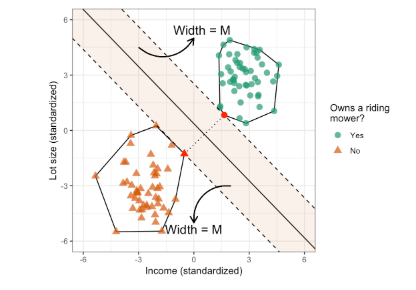)

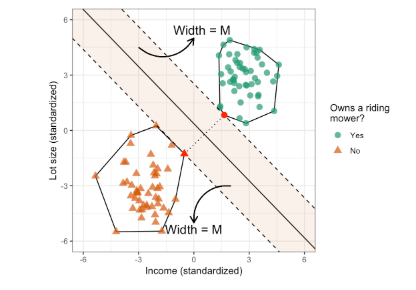

Se vuelve un problema de minimización, M es la distancia de limite del conjunto separador a la linea recta sujeto a que 

$$
\begin{array}{ll}
\underset{\beta_0, \beta_1, \dots, \beta_p}{\text{maximize}} & M \\
\text{subject to} &
    \begin{cases}
        \sum_{j=1}^{p} \beta_j^2 = 1, \\[1ex]
        y_i (\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}) \ge M, \quad i = 1, 2, \dots, n
    \end{cases}
\end{array}
$$

Dicho de otra manera, el HMC encuentra el hiperplano separador que proporciona el mayor margen o separación entre las dos clases. El ancho de ambas fronteras del margen es \( M \).

Con la restricción:

$$
\sum_{j=1}^{p} \beta_j^2 = 1,
$$

la cantidad:

$$
y_i \left( \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} \right)
$$

representa la distancia desde el \( i \)-ésimo punto de datos hasta la frontera de decisión.

Cabe notar que la solución al problema de optimización anterior **no permite que ningún punto esté en el lado incorrecto del margen**; de ahí el término *clasificador de margen duro* (*hard margin classifier*).


La distancia geométrica perpendicular desde un punto $(x_{i1}, x_{i2})$ hasta la línea 
$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$ es:

$$
\text{Distancia} = \frac{|\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}|}{\sqrt{\beta_1^2 + \beta_2^2}}
$$

Ahora, mira la restricción de normalización en la formulación de la imagen: 
$\sum \beta_j^2 = 1$, 

que en nuestro caso 2D significa $\beta_1^2 + \beta_2^2 = 1$. Por lo tanto:

$$
\sqrt{\beta_1^2 + \beta_2^2} = 1
$$


Separador lineal:

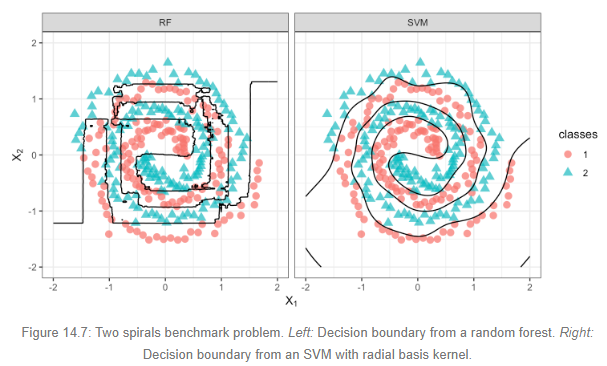

Okay, aquí tienes la explicación en formato Markdown, comenzando con las ecuaciones de los kernels populares:

$$
\begin{aligned}
\text{Polinomial de grado } d: \quad & K(\mathbf{x}, \mathbf{x}') = \gamma(1 + \langle \mathbf{x}, \mathbf{x}' \rangle)^d \\
\text{Función de base radial (RBF):} \quad & K(\mathbf{x}, \mathbf{x}') = \exp(\gamma \|\mathbf{x} - \mathbf{x}'\|^2) \\
\text{Tangente Hiperbólica:} \quad & K(\mathbf{x}, \mathbf{x}') = \tanh(k_1 \|\mathbf{x} - \mathbf{x}'\| + k_2)
\end{aligned}
$$

---

A continuación se explica cómo los hiperparámetros `kernel`, `C` y `gamma` se relacionan con estas ecuaciones en una Máquina de Vectores de Soporte (SVM):

*   **`kernel` (El Tipo de Función):**
    *   Este hiperparámetro **determina cuál de las ecuaciones anteriores (o alguna otra, como la lineal)** se utilizará para calcular la "similitud" o el producto escalar implícito `K(x, x')` entre dos puntos (`x` y `x'`) en el espacio potencialmente transformado.
    *   Si eliges `kernel='poly'` en tu implementación de SVM, se usará la primera ecuación.
    *   Si eliges `kernel='rbf'`, se usará la segunda ecuación.
    *   Si eliges `kernel='sigmoid'`, se usará (una versión de) la tercera ecuación (tangente hiperbólica).
    *   Si eliges `kernel='linear'`, simplemente se usaría el producto escalar estándar $\langle \mathbf{x}, \mathbf{x}' \rangle$ (no mostrado en las ecuaciones anteriores, pero es el caso base).
    *   **En resumen:** El parámetro `kernel` selecciona la **forma matemática fundamental** de la función `K(x, x')` que define la relación entre los puntos.

*   **`gamma` (γ):**
    *   Este hiperparámetro **aparece explícitamente dentro de las fórmulas** de varios kernels no lineales, como el Polinomial y el RBF (y a menudo en la implementación estándar del Sigmoide, aunque la fórmula específica mostrada usa `k₁` y `k₂`).
    *   **Kernel Polinomial:** En la fórmula `K(x, x') = γ(1 + <x, x'>)^d`, `γ` actúa como un **coeficiente de escala** global para el resultado del kernel. *(Nota importante: La implementación común en librerías como Scikit-learn a menudo tiene una forma ligeramente diferente donde `gamma` multiplica el producto escalar *dentro* del paréntesis, como `(gamma * <x, x'> + coef0)^d`. La fórmula de la imagen es una variación.)*
    *   **Kernel RBF:** En `K(x, x') = exp(γ||x - x'||²)`, `gamma` es un parámetro **crítico** que define hasta qué punto influye un solo ejemplo de entrenamiento. Un `gamma` bajo significa una influencia lejana (curva de similitud ancha), y un `gamma` alto significa una influencia cercana (curva estrecha). Se encuentra **dentro** del exponente.
    *   **Kernel Tangente Hiperbólica/Sigmoide:** En la fórmula específica mostrada `K(x, x') = tanh(k₁||x - x'|| + k₂)`), `gamma` no aparece con ese nombre, pero los parámetros `k₁` y `k₂` (que serían hiperparámetros de este kernel, a veces relacionados con `gamma` y `coef0` en las implementaciones) cumplen una función similar de escalar y desplazar la entrada de la función `tanh`. En la formulación más estándar del kernel sigmoide (`tanh(gamma * <x, x'> + coef0)`), `gamma` sí aparecería multiplicando el producto escalar.
    *   **En resumen:** `gamma` es un parámetro que **ajusta el comportamiento específico** de la función kernel elegida (cuando aplica para ese kernel). No todos los kernels lo usan, y su rol exacto puede variar ligeramente.

*   **`C` (Parámetro de Regularización):**
    *   Este hiperparámetro fundamental **NO aparece directamente en ninguna de las ecuaciones de las funciones kernel `K(x, x')` mostradas**.
    *   `C` es parte del **objetivo del problema de optimización global** que resuelve la SVM (específicamente en el "Soft Margin SVM"). **No afecta cómo se calcula la similitud `K(x, x')` entre dos puntos**, sino cómo se usa esa similitud para encontrar la frontera de decisión final.
    *   `C` controla el **compromiso entre lograr un margen amplio y clasificar correctamente los puntos de entrenamiento**:
        *   **`C` Alto:** Penaliza fuertemente los errores de clasificación. El optimizador intentará minimizar el número de puntos mal clasificados, lo que puede llevar a un margen más estrecho y potencialmente a sobreajustar (overfitting) los datos de entrenamiento.
        *   **`C` Bajo:** Penaliza menos los errores. Permite un margen más amplio, incluso si algunos puntos de entrenamiento quedan dentro del margen o del lado incorrecto. Esto puede mejorar la generalización pero, si es demasiado bajo, puede llevar a subajustar (underfitting).
    *   **En resumen:** `C` es un parámetro de **regularización** que actúa a nivel del **entrenamiento global del modelo SVM**, controlando la complejidad del modelo y su tolerancia a los errores en el conjunto de entrenamiento, pero es independiente de la fórmula matemática específica del kernel elegido.


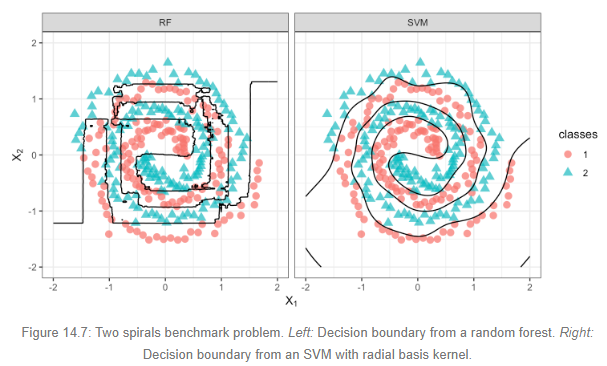

### 1. Carga y Preparación

*   Cargamos el dataset Iris y seleccionamos solo las columnas de índice 2 (**Longitud del Pétalo**) y 3 (**Ancho del Pétalo**) para `X`.
*   La variable `y` contiene las etiquetas de las especies (0: setosa, 1: versicolor, 2: virginica).

### 2. División Train/Test

*   Dividimos los datos en un 70% para entrenamiento (`X_train`, `y_train`) y un 30% para prueba (`X_test`, `y_test`).
*   El parámetro `stratify=y` asegura que la proporción de cada especie sea similar en ambos conjuntos.

### 3. Escalado

*   Usamos `StandardScaler` para transformar las características de entrenamiento y prueba.
*   Se ajusta (`fit`) **solo** con los datos de entrenamiento y luego se aplica (`transform`) a ambos conjuntos.
*   Esto es importante porque SVM es sensible a las diferentes escalas de las características.

### 4. Entrenamiento SVM

*   Creamos una instancia de `SVC` (Support Vector Classifier).
*   **Parámetros clave utilizados:**
    *   `kernel='rbf'`: Elegimos el kernel de **Función de Base Radial (RBF)**, que puede crear fronteras de decisión curvas y complejas, adecuado para muchos problemas.
    *   `C=1.0`: Es el parámetro de **regularización**. Un valor más alto fuerza al modelo a intentar clasificar correctamente más puntos de entrenamiento (puede llevar a overfitting), mientras que un valor más bajo permite más errores a cambio de un margen potencialmente más amplio.
    *   `gamma='scale'`: Controla la influencia de un solo ejemplo de entrenamiento. `'scale'` es un valor por defecto razonable que se ajusta automáticamente según la desviación estándar de los datos.
*   Entrenamos el modelo (`model.fit()`) usando los datos de entrenamiento **escalados**.

### 5. Evaluación

*   Hacemos predicciones (`model.predict()`) sobre los datos de prueba **escalados**.
*   Calculamos y mostramos la precisión general (`accuracy_score`).
*   Mostramos un reporte más detallado (`classification_report`) que incluye precisión, recall y F1-score para cada clase.

### 6. Visualización

*   La función `plot_decision_boundary` realiza lo siguiente:
    *   Crea una malla fina de puntos (`xx`, `yy`) que cubre todo el rango de las características escaladas.
    *   Usa el modelo entrenado (`model_svm.predict`) para predecir la clase a la que pertenecería cada punto de la malla.
    *   Dibuja regiones de colores (`plt.contourf`) según la predicción para cada punto de la malla. Cada color representa una clase predicha por el SVM.
    *   Superpone los puntos de datos reales (`plt.scatter`), coloreados según su verdadera clase. Esto permite ver visualmente cómo el modelo separa (o no) las clases y dónde ocurren los errores.
*   El gráfico muestra las tres regiones de decisión (una para cada especie de Iris) creadas por el SVM con el kernel RBF. Los puntos representan las flores reales. Idealmente, los puntos de un color deberían caer mayormente dentro de la región de decisión de ese mismo color. Puedes ver cómo la frontera curva del RBF intenta separar las clases.

---

*Este ejemplo te da una idea visual básica de cómo funciona SVM para clasificación en un problema simple y cómo evaluar su rendimiento inicial.*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

print("--- Ejemplo SVM Simple: Clasificación Iris (2 Features) ---")

# --- 1. Cargar y Preparar Datos ---
print("\n--- 1. Cargando y Preparando Datos (Iris) ---")
iris = datasets.load_iris()

# Seleccionar solo dos características: Petal Length (índice 2) y Petal Width (índice 3)
X = iris.data[:, [2, 3]]
y = iris.target

# Nombres para los ejes y leyenda
feature_names = [iris.feature_names[2], iris.feature_names[3]]
target_names = iris.target_names

print(f"Características seleccionadas: {feature_names}")
print(f"Clases: {target_names}")
print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")

# --- 2. Dividir en Entrenamiento y Prueba ---
# Dividimos ANTES de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTamaño Entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño Prueba: {X_test.shape[0]} muestras")



--- Ejemplo SVM Simple: Clasificación Iris (2 Features) ---

--- 1. Cargando y Preparando Datos (Iris) ---
Características seleccionadas: ['petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']
Forma de X: (150, 2), Forma de y: (150,)

Tamaño Entrenamiento: 105 muestras
Tamaño Prueba: 45 muestras


In [4]:

# --- 3. Escalar Características ---
# SVM es sensible a la escala de las características. Es buena práctica escalar.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nCaracterísticas escaladas (media 0, desviación estándar 1).")

# --- 4. Entrenar el Modelo SVM ---
print("\n--- 4. Entrenando el Modelo SVM ---")
# Usaremos el kernel RBF (Radial Basis Function), que es bueno para fronteras no lineales.
# C es el parámetro de regularización.
# gamma controla la influencia de cada punto ('scale' es un buen valor por defecto).
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True) # probability=True es útil para algunas visualizaciones

# Entrenar con los datos de entrenamiento escalados
model_svm.fit(X_train_scaled, y_train)
print("Modelo SVM entrenado (Kernel RBF).")

# --- 5. Evaluar el Modelo ---
print("\n--- 5. Evaluación del Modelo ---")
# Predecir en el conjunto de prueba escalado
y_pred = model_svm.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Mostrar reporte de clasificación más detallado
print("\nReporte de Clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred, target_names=target_names))



Características escaladas (media 0, desviación estándar 1).

--- 4. Entrenando el Modelo SVM ---
Modelo SVM entrenado (Kernel RBF).

--- 5. Evaluación del Modelo ---
Accuracy en el conjunto de prueba: 0.9111

Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45




--- 6. Generando Gráfico de Frontera de Decisión ---


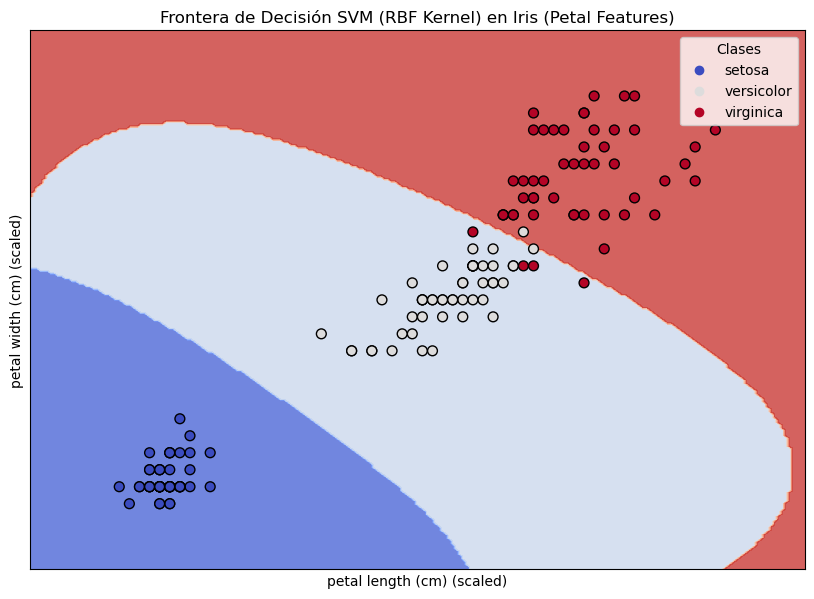


--- Fin del Ejemplo ---


In [5]:

# --- 6. Visualización de la Frontera de Decisión ---
print("\n--- 6. Generando Gráfico de Frontera de Decisión ---")

def plot_decision_boundary(X, y, model, scaler, title):
    # Usaremos los datos escalados para graficar la frontera
    X_scaled = scaler.transform(X) # Escalar todos los datos para graficar

    # Crear una malla de puntos para cubrir el espacio de características
    h = .02  # tamaño del paso en la malla
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Graficar los puntos de datos (usando los originales para la leyenda de colores)
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm,
                        edgecolor='k', s=50)

    # Añadir títulos y etiquetas
    plt.title(title)
    plt.xlabel(feature_names[0] + ' (scaled)')
    plt.ylabel(feature_names[1] + ' (scaled)')

    # Crear leyenda
    handles, _ = scatter.legend_elements()
    plt.legend(handles, target_names, title="Clases")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Graficar usando todos los datos (para ver cómo separa todo el conjunto)
# y mostrando la frontera aprendida del modelo entrenado solo con 'train'
plot_decision_boundary(X, y, model_svm, scaler, 'Frontera de Decisión SVM (RBF Kernel) en Iris (Petal Features)')

# (Opcional) Graficar solo los puntos de entrenamiento y prueba por separado
def plot_train_test_points(X_train_s, y_train, X_test_s, y_test, scaler, title):
    plt.figure(figsize=(10, 7))
    # Graficar puntos de entrenamiento
    scatter_train = plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, cmap=plt.cm.coolwarm,
                                marker='o', edgecolor='k', s=50, label='Train')
    # Graficar puntos de prueba
    scatter_test = plt.scatter(X_test_s[:, 0], X_test_s[:, 1], c=y_test, cmap=plt.cm.coolwarm,
                               marker='X', edgecolor='k', s=80, label='Test')

    plt.title(title)
    plt.xlabel(feature_names[0] + ' (scaled)')
    plt.ylabel(feature_names[1] + ' (scaled)')
    handles_train, _ = scatter_train.legend_elements()
    handles_test, _ = scatter_test.legend_elements() # Puede que no sea necesario si los colores son los mismos
    plt.legend(handles_train, target_names, title="Clases")
    plt.show()

# plot_train_test_points(X_train_scaled, y_train, X_test_scaled, y_test, scaler, "Puntos de Entrenamiento (o) y Prueba (X)")


print("\n--- Fin del Ejemplo ---")


# Validación Cruzada y Evaluación Final: Un Ejemplo Práctico

## 1. El Problema: ¿Cómo sé si mi modelo es realmente bueno?

Cuando entrenamos un modelo de Machine Learning, queremos que funcione bien no solo con los datos que ya ha visto, sino **especialmente con datos nuevos y desconocidos**.

*   **Error común 1: Entrenar y evaluar con los mismos datos.** Si haces esto, el modelo puede "memorizar" las respuestas y obtener una puntuación perfecta, pero fallará estrepitosamente con datos nuevos (esto se llama **sobreajuste** u **overfitting**).
*   **Error común 2: Dividir una sola vez en entrenamiento y prueba.** Separas tus datos (ej: 80% entreno, 20% prueba), entrenas con el 80% y evalúas con el 20%. ¡Mejor! Pero... ¿y si tuviste "mala suerte" al dividir y la prueba era muy fácil o muy difícil? El resultado podría no ser representativo del rendimiento real.

## 2. La Solución: Validación Cruzada + Conjunto de Prueba Final

Para obtener una estimación **más robusta** del rendimiento del modelo y realizar una **evaluación final honesta**, combinamos dos técnicas:

1.  **Conjunto de Prueba Final (Hold-out Set):** Al principio, **separamos una pequeña porción de TODOS nuestros datos** (ej: 20%-30%) y la guardamos "bajo llave". ¡No la tocaremos hasta el final! Este es nuestro `D_prueba_final`.
2.  **Validación Cruzada (Cross-Validation, CV):** Con el resto de los datos (el 70%-80% que llamaremos `D_entrenamiento_completo`), aplicamos la validación cruzada (como la K-Fold que vimos).

### Analogía del Estudio y Examen:

*   **TODOS tus apuntes y libros:** Todos tus datos.
*   **Separar un Examen Simulado Final (20%) y guardarlo:** Crear `D_prueba_final`.
*   **Apuntes que usarás para estudiar (80%):** `D_entrenamiento_completo`.
*   **Estudiar por temas (Folds) y hacer mini-tests después de cada tema (Validación Cruzada):** Entrenar y evaluar K veces sobre `D_entrenamiento_completo`. Te da una **idea promedio (más fiable)** de cuánto estás entendiendo (`rendimiento_CV`). Te ayuda a ver si tu método de estudio (el tipo de modelo, sus hiperparámetros) es bueno.
*   **Repasar TODOS los apuntes de estudio (80%) antes del examen final:** Entrenar **UN modelo final** (`modelo_final`) con todo `D_entrenamiento_completo`.
*   **Hacer el Examen Simulado Final (20%) que tenías guardado:** Evaluar `modelo_final` en `D_prueba_final`. Esta es tu **nota final y más realista** (`rendimiento_final`).


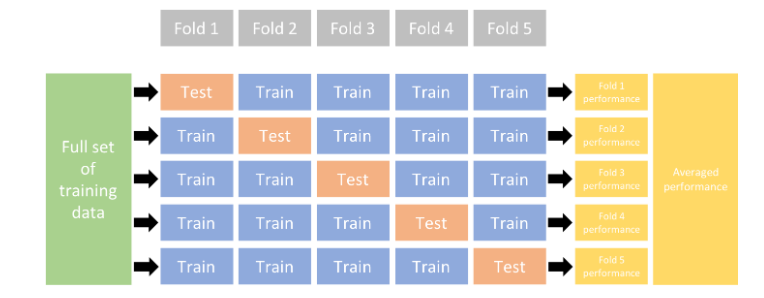


## 3. El Flujo de Trabajo Completo

El flujo completo en la práctica es:

1.  **División Inicial:** Divide **TODOS** tus datos en `D_entrenamiento_completo` y `D_prueba_final`. Guarda `D_prueba_final`.
2.  **Validación Cruzada (CV):**
    *   Usa **SOLO** `D_entrenamiento_completo`.
    *   Divídelo en K folds (pliegues).
    *   Entrena K modelos, cada vez usando K-1 folds para entrenar y 1 fold para validar.
    *   Calcula la métrica de rendimiento (ej: accuracy) en cada validación.
    *   Obtén la **media y desviación estándar** de esas K métricas. Esto te da una estimación robusta del rendimiento esperado (`rendimiento_CV`). *Opcional: Usa estos resultados para ajustar hiperparámetros (GridSearchCV, RandomizedSearchCV)*.
3.  **Entrenamiento del Modelo Final:**
    *   Elige el tipo de modelo y los hiperparámetros (basado en la CV si hiciste ajuste).
    *   Entrena **UN SOLO** modelo (`modelo_final`) usando **TODO** `D_entrenamiento_completo`.
4.  **Evaluación Final:**
    *   Desempolva el `D_prueba_final` (que el modelo nunca ha visto).
    *   Usa `modelo_final` para hacer predicciones sobre `D_prueba_final`.
    *   Calcula la métrica de rendimiento final (`rendimiento_final`). **Este es el resultado que reportas como la evaluación definitiva del modelo.**

## 4. Ejemplo Práctico con Dataset "Wine" y RandomForest

Vamos a aplicar este flujo completo. Usaremos el dataset "Wine" 

In [6]:
# Paso 0: Importar librerías necesarias
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Paso 1: Cargar y Dividir los Datos (División Inicial)
# Cargamos el dataset Wine
wine = load_wine()
X = wine.data
y = wine.target

In [4]:

# Dividimos TODOS los datos en:
# - D_entrenamiento_completo (80%): Para CV y entrenamiento final
# - D_prueba_final (20%): Para la evaluación final, ¡intocable hasta el final!
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
) # stratify=y asegura proporción de clases en ambos splits

print("\n--- Paso 1: División Inicial ---")
print(f"Forma de TODO X: {X.shape}")
print(f"Forma de X_train_full (80%): {X_train_full.shape}")
print(f"Forma de X_test (20%): {X_test.shape}")



--- Paso 1: División Inicial ---
Forma de TODO X: (178, 13)
Forma de X_train_full (80%): (142, 13)
Forma de X_test (20%): (36, 13)


In [5]:

# Paso 2: Validación Cruzada (sobre D_entrenamiento_completo)
print("\n--- Paso 2: Validación Cruzada (sobre el 80% de entrenamiento) ---")

# Definimos el modelo que queremos evaluar
# Usaremos un RandomForest con hiperparámetros por defecto por simplicidad
model_to_evaluate = RandomForestClassifier(n_estimators=100, random_state=42)

# Definimos la estrategia de Validación Cruzada (K-Fold con K=5)
# Usar shuffle=True es buena práctica si los datos tuvieran algún orden inherente
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)



--- Paso 2: Validación Cruzada (sobre el 80% de entrenamiento) ---


In [6]:
# Realizamos la validación cruzada
# cross_val_score entrena y evalúa automáticamente K veces
# OJO: Usamos SOLO X_train_full y y_train_full !!
print("Realizando Validación Cruzada K=5...")
cv_scores = cross_val_score(model_to_evaluate,
                            X_train_full,
                            y_train_full,
                            cv=cv_strategy,
                            scoring='accuracy') # Queremos medir la precisión

print(f"Puntuaciones de Accuracy en cada Fold: {cv_scores}")
mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)
print(f"Accuracy Media (CV): {mean_cv_accuracy:.4f}")
print(f"Desviación Estándar (CV): {std_cv_accuracy:.4f}")
print("Interpretación: Esperamos que un RandomForest entrenado con datos similares")
print(f"tenga una precisión cercana a {mean_cv_accuracy*100:.2f}% +/- {std_cv_accuracy*100:.2f}%")


Realizando Validación Cruzada K=5...
Puntuaciones de Accuracy en cada Fold: [1.         0.93103448 1.         1.         0.96428571]
Accuracy Media (CV): 0.9791
Desviación Estándar (CV): 0.0277
Interpretación: Esperamos que un RandomForest entrenado con datos similares
tenga una precisión cercana a 97.91% +/- 2.77%


In [7]:
# Paso 3: Entrenar el Modelo Final (sobre D_entrenamiento_completo)
print("\n--- Paso 3: Entrenamiento del Modelo Final (sobre el 80% completo) ---")

# Creamos y entrenamos nuestro modelo final usando TODOS los datos de D_entrenamiento_completo
# Usamos la misma configuración que evaluamos en la CV
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_full, y_train_full)

print("Modelo final entrenado con éxito usando X_train_full.")



--- Paso 3: Entrenamiento del Modelo Final (sobre el 80% completo) ---
Modelo final entrenado con éxito usando X_train_full.


In [8]:
# Paso 4: Evaluación Final (sobre D_prueba_final)
print("\n--- Paso 4: Evaluación Final (sobre el 20% de prueba apartado) ---")

# ¡Ahora sí! Usamos el X_test y y_test que habíamos guardado
y_pred_final = final_model.predict(X_test)

# Calculamos la precisión final
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Predicciones sobre el conjunto de prueba final realizadas.")
print(f"Accuracy Final (sobre X_test): {final_accuracy:.4f}")

# Comparación y Conclusión
print("\n--- Conclusiones ---")
print(f"La Validación Cruzada nos dio una estimación de Accuracy de: {mean_cv_accuracy:.4f}")
print(f"La Evaluación Final sobre datos NUNCA vistos (X_test) dio: {final_accuracy:.4f}")

if abs(mean_cv_accuracy - final_accuracy) < 2 * std_cv_accuracy:
    print("El rendimiento final está en línea con lo esperado por la Validación Cruzada. ¡Bien!")
else:
    print("¡Atención! El rendimiento final difiere significativamente de la estimación de CV.")
    print("Esto podría indicar problemas (quizás el split inicial fue desafortunado,")
    print("o el dataset es pequeño y la varianza es alta).")

print("\nEl 'final_model' es el modelo que guardarías y usarías para predecir datos nuevos en producción.")
print("Su rendimiento esperado más fiable es el obtenido en la evaluación final.")


--- Paso 4: Evaluación Final (sobre el 20% de prueba apartado) ---
Predicciones sobre el conjunto de prueba final realizadas.
Accuracy Final (sobre X_test): 1.0000

--- Conclusiones ---
La Validación Cruzada nos dio una estimación de Accuracy de: 0.9791
La Evaluación Final sobre datos NUNCA vistos (X_test) dio: 1.0000
El rendimiento final está en línea con lo esperado por la Validación Cruzada. ¡Bien!

El 'final_model' es el modelo que guardarías y usarías para predecir datos nuevos en producción.
Su rendimiento esperado más fiable es el obtenido en la evaluación final.


# Grilla

Explicaremos como generamos grillas

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Usaremos Support Vector Classifier como ejemplo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid # Ayuda a generar combinaciones
import time

print("--- Ejemplo Simple: Grid Search Manual (sin CV interna) ---")

# --- 1. Cargar Datos (Dataset Iris) ---
print("\n--- 1. Cargando Datos (Iris) ---")
iris = load_iris()
X, y = iris.data, iris.target

print(f"Forma de los datos: Features X={X.shape}, Target y={y.shape}")
print(f"Clases: {iris.target_names}") # 0: setosa, 1: versicolor, 2: virginica
print(f"Nombres de las características: {iris.feature_names}")

# --- 2. Dividir en Train / Validation / Test ---
# Primero, separamos el Test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Luego, dividimos el resto (X_train_val) en Train (60% del total) y Validation (20% del total)
# test_size=0.25 significa 25% de X_train_val, que es 0.25 * 0.80 = 0.20 del total original.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"\nTamaño del conjunto de Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de Validación:   {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de Prueba:      {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# --- 3. Definir Modelo Base y Rejilla de Hiperparámetros ---
# Usaremos SVC. Queremos encontrar los mejores 'C' y 'gamma'.
# NO creamos una instancia aquí todavía, la crearemos dentro del bucle.

# Rejilla de parámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],          # Parámetro de regularización
    'gamma': [1, 0.1, 0.01, 0.001],  # Coeficiente del kernel RBF
    'kernel': ['rbf']              # Usaremos solo el kernel RBF
}

# Crear todas las combinaciones posibles a partir de la rejilla
grid = ParameterGrid(param_grid)
num_combinations = len(grid)

print(f"\n--- 3. Rejilla de Hiperparámetros para SVC (Kernel RBF) ---")
print(param_grid)
print(f"Número total de combinaciones a probar: {num_combinations}")

# --- 4. Bucle Manual de Grid Search ---
print("\n--- 4. Ejecutando Grid Search Manualmente ---")

best_score_val = -1  # Inicializar la mejor puntuación (en validación)
best_params = {}     # Diccionario para guardar los mejores parámetros
all_results = []     # Lista para guardar todos los resultados (opcional)

start_time = time.time()

# Iterar sobre cada combinación de parámetros en la rejilla
for i, params in enumerate(grid):
    print(f"Probando combinación {i+1}/{num_combinations}: {params}")

    # a) Crear una NUEVA instancia del modelo con los parámetros actuales
    #    Es importante crear una nueva instancia limpia cada vez.
    model = SVC(**params, random_state=42, probability=False) # probability=False es más rápido si no la necesitas

    # b) Entrenar el modelo con el conjunto de ENTRENAMIENTO (Train)
    model.fit(X_train, y_train)

    # c) Evaluar el modelo en el conjunto de VALIDACIÓN (Validation)
    y_pred_val = model.predict(X_val)
    current_score_val = accuracy_score(y_val, y_pred_val)
    print(f"  Accuracy en Validación: {current_score_val:.4f}")

    # Guardar el resultado (opcional)
    all_results.append({'params': params, 'validation_accuracy': current_score_val})

    # d) Actualizar si encontramos una mejor combinación
    if current_score_val > best_score_val:
        print(f"  ¡Nueva mejor puntuación encontrada!")
        best_score_val = current_score_val
        best_params = params

search_time = time.time() - start_time
print(f"\nGrid Search Manual completado en {search_time:.2f} segundos.")

# --- 5. Resultados de la Búsqueda ---
print("\n--- 5. Resultados del Grid Search ---")
print(f"Mejores parámetros encontrados (según el set de Validación):")
print(best_params)
print(f"Mejor Accuracy obtenido en el set de Validación: {best_score_val:.4f}")

# (Opcional) Mostrar todos los resultados
# print("\nTodos los resultados:")
# for res in all_results:
#    print(f"  Params: {res['params']}, Val Accuracy: {res['validation_accuracy']:.4f}")

# --- 6. Evaluación Final en el Conjunto de Prueba (Test Set) ---
print("\n--- 6. Evaluación Final del Mejor Modelo ---")

# a) Crear el modelo final usando los MEJORES parámetros encontrados
print(f"Creando y entrenando el modelo final con: {best_params}")
final_model = SVC(**best_params, random_state=42)

# b) Entrenar el modelo final usando TODOS los datos disponibles ANTES del Test set
#    (Es decir, combinamos Train + Validation) para darle más datos al modelo final.
final_model.fit(X_train_val, y_train_val)
print("Modelo final entrenado en el conjunto combinado Train+Validation.")

# c) Evaluar el modelo final en el conjunto de PRUEBA (Test), datos nunca vistos antes.
y_pred_test = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nAccuracy del modelo final en el conjunto de Prueba (Test): {test_accuracy:.4f}")
print("\n--- Fin del Ejemplo Simple ---")

--- Ejemplo Simple: Grid Search Manual (sin CV interna) ---

--- 1. Cargando Datos (Iris) ---
Forma de los datos: Features X=(150, 4), Target y=(150,)
Clases: ['setosa' 'versicolor' 'virginica']
Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Tamaño del conjunto de Entrenamiento: 90 muestras (60.0%)
Tamaño del conjunto de Validación:   30 muestras (20.0%)
Tamaño del conjunto de Prueba:      30 muestras (20.0%)

--- 3. Rejilla de Hiperparámetros para SVC (Kernel RBF) ---
{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
Número total de combinaciones a probar: 16

--- 4. Ejecutando Grid Search Manualmente ---
Probando combinación 1/16: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
  Accuracy en Validación: 0.9000
  ¡Nueva mejor puntuación encontrada!
Probando combinación 2/16: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
  Accuracy en Validación: 0.9333
  ¡Nueva mejor puntuación encontrada!
Probando comb

Lo siguiente correrlo en colab

# Comparación de múltiples modelos


In [7]:
import numpy as np
import pandas as pd # Para mostrar resultados de forma más clara
import time # Para medir el tiempo

# --- Scikit-learn ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline # Útil para combinar preprocesamiento y modelo
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
pip install skorch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
 from skorch import NeuralNetBinaryClassifier

In [ ]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
print(f"Forma de los datos: Features X={X.shape}, Target y={y.shape}")
print(f"Clases: {np.unique(y)}") # 0: Maligno, 1: Benigno

In [ ]:
# Dividir en entrenamiento y prueba ANTES de cualquier preprocesamiento (como escalar)
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Asegurarse de que los datos X sean float32 para PyTorch/Skorch
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Asegurarse de que los datos X sean float32 para PyTorch/Skorch
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

Estrategia de Validación Cruzada: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# --- 3. Random Forest con Grid Search ---



# Hiperparámetros para Random Forest

- **n_estimators**: Número de árboles en el bosque.  
  Más árboles generalmente mejoran el rendimiento, pero aumentan el costo computacional.  
  Demasiados pueden llevar a un **overfitting leve**.

- **max_depth**: Profundidad máxima de cada árbol.  
  Controla la complejidad del árbol. Si es muy alto, los árboles pueden sobreajustarse a los datos de entrenamiento.  
  `None` significa que los nodos se expanden hasta que todas las hojas son puras.

- **min_samples_split**: Número mínimo de muestras requeridas para dividir un nodo interno.  
  Controla la complejidad: valores más altos **previenen el overfitting**.

- **min_samples_leaf**: Número mínimo de muestras requeridas en un nodo hoja.  
  También ayuda a **regularizar** y prevenir el sobreajuste.

- **criterion**: Función para medir la calidad de una división.  
  Puede ser `'gini'` o `'entropy'`.


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    # 'criterion': ['gini', 'entropy'] # Podríamos añadirlo si quisiéramos
}
print("Grid de Hiperparámetros para Random Forest:")
print(param_grid_rf)

In [ ]:
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=cv_strategy,
    scoring='accuracy', # Métrica para evaluar
    verbose=1,
    n_jobs=-1 # Usar todos los cores disponibles
)
print("Grid de Hiperparámetros para Random Forest:")
print(param_grid_rf)

In [ ]:
start_time = time.time()
print("\nIniciando Grid Search para Random Forest...")
# Usamos los datos escalados
grid_search_rf.fit(X_train_scaled, y_train)
rf_time = time.time() - start_time
print(f"Grid Search para RF completado en {rf_time:.2f} segundos.")

print("\nResultados Random Forest:")
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Mejor puntuación (Accuracy) en CV: {grid_search_rf.best_score_:.4f}")

# Guardar el mejor modelo RF
best_rf = grid_search_rf.best_estimator_

# --- 4. XGBoost con Grid Search ---
print("\n--- 4. XGBoost ---")

if XGBClassifier:
    xgb_model = XGBClassifier(
        random_state=42,
        use_label_encoder=False, # Recomendado para versiones recientes
        eval_metric='logloss' # Métrica interna para el entrenamiento de XGBoost
    )


In [ ]:
# --- 4. XGBoost con Grid Search ---
print("\n--- 4. XGBoost ---")

if XGBClassifier:
    xgb_model = XGBClassifier(
        random_state=42,
        use_label_encoder=False, # Recomendado para versiones recientes
        eval_metric='logloss' # Métrica interna para el entrenamiento de XGBoost
    )

    # Hiperparámetros para XGBoost:
    # - n_estimators: Número de árboles (rondas de boosting). Similar a RF.
    # - max_depth: Profundidad máxima de cada árbol. Controla complejidad.
    # - learning_rate (eta): Tasa de aprendizaje. Reduce la contribución de cada árbol.
    #                        Valores más bajos requieren más n_estimators. Previene overfitting.
    # - gamma: Mínima reducción de pérdida requerida para hacer una partición. Controla complejidad.
    # - subsample: Fracción de muestras usadas para entrenar cada árbol. Previene overfitting.
    # - colsample_bytree: Fracción de características usadas para entrenar cada árbol.
    param_grid_xgb = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'gamma': [0, 0.1, 0.5],
        # 'subsample': [0.7, 1.0],
        # 'colsample_bytree': [0.7, 1.0]
    }
    print("Grid de Hiperparámetros para XGBoost:")
    print(param_grid_xgb)

    grid_search_xgb = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        cv=cv_strategy,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    start_time = time.time()
    print("\nIniciando Grid Search para XGBoost...")
    # Usamos los datos escalados
    grid_search_xgb.fit(X_train_scaled, y_train)
    xgb_time = time.time() - start_time
    print(f"Grid Search para XGBoost completado en {xgb_time:.2f} segundos.")

    print("\nResultados XGBoost:")
    print(f"Mejores parámetros: {grid_search_xgb.best_params_}")
    print(f"Mejor puntuación (Accuracy) en CV: {grid_search_xgb.best_score_:.4f}")

    # Guardar el mejor modelo XGB
    best_xgb = grid_search_xgb.best_estimator_
else:
    print("\nXGBoost no está instalado. Saltando este paso.")
    best_xgb = None
    xgb_time = 0
    grid_search_xgb = None # Para la tabla de resultados


In [ ]:
# --- 5. Red Neuronal (PyTorch + Skorch) con Grid Search ---
print("\n--- 5. Red Neuronal (PyTorch + Skorch) ---")

if torch and NeuralNetBinaryClassifier:
    # Definir la arquitectura de la Red Neuronal con PyTorch
    class SimpleNN(nn.Module):
        def __init__(self, input_dim, hidden_units=32, nonlin=nn.ReLU()):
            super(SimpleNN, self).__init__()
            self.layer_1 = nn.Linear(input_dim, hidden_units)
            self.nonlin = nonlin
            self.output_layer = nn.Linear(hidden_units, 1) # 1 neurona para salida binaria con BCEWithLogitsLoss

        def forward(self, x):
            x = self.nonlin(self.layer_1(x))
            x = self.output_layer(x) # La sigmoide está implícita en BCEWithLogitsLoss
            return x

    # Determinar dispositivo (CPU o GPU si está disponible)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Usando dispositivo para PyTorch: {device}")

    # Crear el wrapper Skorch
    # Nota: Los parámetros del *módulo* PyTorch (como hidden_units) se pasan con el prefijo 'module__'
    # Los parámetros del *optimizador* se pasan con 'optimizer__'
    # Los parámetros del *entrenamiento* (como max_epochs) se pasan directamente
    net = NeuralNetBinaryClassifier(
        module=SimpleNN,
        module__input_dim=X_train_scaled.shape[1], # Número de features
        # module__hidden_units=32, # Esto será un hiperparámetro en el grid
        # module__nonlin=nn.ReLU(),# Podemos probar diferentes activaciones
        criterion=nn.BCEWithLogitsLoss, # Función de pérdida para clasificación binaria
        optimizer=optim.Adam,
        # lr=0.01,                # Learning rate será un hiperparámetro
        max_epochs=50,          # Número de épocas de entrenamiento (puede ser hiperparámetro)
        batch_size=32,          # Tamaño del lote (puede ser hiperparámetro)
        device=device,
        verbose=0,              # Silenciar el output de entrenamiento de Skorch durante GridSearch
        # Callbacks opcionales (ej: EarlyStopping)
        # callbacks=[skorch.callbacks.EarlyStopping(patience=5)]
    )

    # Hiperparámetros para la Red Neuronal:
    # - lr: Tasa de aprendizaje del optimizador (Adam en este caso). Controla el tamaño de los pasos
    #       en la actualización de pesos. Demasiado grande puede diverger, demasiado pequeño puede ser lento.
    # - max_epochs: Número de veces que el algoritmo ve el conjunto de datos completo.
    # - batch_size: Número de muestras procesadas antes de actualizar los pesos.
    # - module__hidden_units: Número de neuronas en la capa oculta. Controla la capacidad del modelo.
    # - optimizer__weight_decay: Término de regularización L2 (penalización de pesos grandes) para el
    #                            optimizador. Ayuda a prevenir el overfitting.
    param_grid_nn = {
        'lr': [0.01, 0.001],
        'max_epochs': [50, 100],
        'module__hidden_units': [16, 32, 64], # Tamaño de la capa oculta
        'optimizer__weight_decay': [0.0001, 0.001], # Regularización L2
        # 'batch_size': [16, 32], # Podríamos añadirlo
        # Podríamos probar diferentes optimizadores o funciones de activación también
        # 'optimizer': [optim.Adam, optim.SGD],
        # 'module__nonlin': [nn.ReLU(), nn.Tanh()]
    }
    print("Grid de Hiperparámetros para Red Neuronal:")
    print(param_grid_nn)

    # ¡Importante! GridSearch con redes neuronales puede ser MUY lento.
    # Reducimos el grid o usamos menos folds de CV si es necesario.
    grid_search_nn = GridSearchCV(
        estimator=net,
        param_grid=param_grid_nn,
        cv=cv_strategy,
        scoring='accuracy',
        verbose=1,
        # n_jobs=-1 # A veces n_jobs > 1 puede dar problemas con PyTorch/CUDA, prueba con 1 si falla
        n_jobs=1 # Empezar con 1 por seguridad con PyTorch
    )

    start_time = time.time()
    print("\nIniciando Grid Search para Red Neuronal (puede tardar)...")
    # Skorch espera tensores Float32, nos aseguramos de que los datos lo sean
    # NeuralNetBinaryClassifier también espera y (target) como float32 o long
    # ¡Ojo! Skorch clona el estimador, por lo que no necesitamos pasar tensores aquí,
    # GridSearchCV pasará los arrays numpy (X_train_scaled, y_train) y Skorch los convertirá.
    grid_search_nn.fit(X_train_scaled, y_train)
    nn_time = time.time() - start_time
    print(f"Grid Search para NN completado en {nn_time:.2f} segundos.")

    print("\nResultados Red Neuronal:")
    print(f"Mejores parámetros: {grid_search_nn.best_params_}")
    print(f"Mejor puntuación (Accuracy) en CV: {grid_search_nn.best_score_:.4f}")

    # Guardar el mejor modelo NN
    best_nn = grid_search_nn.best_estimator_
else:
    print("\nPyTorch o Skorch no están instalados. Saltando este paso.")
    best_nn = None
    nn_time = 0
    grid_search_nn = None # Para la tabla de resultados


In [ ]:
# --- 6. Evaluación Final en el Conjunto de Prueba ---
print("\n--- 6. Evaluación Final en el Conjunto de Prueba (Test Set) ---")

results = {}

# Evaluar Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest - Reporte en Test Set:")
print(classification_report(y_test, y_pred_rf, target_names=cancer.target_names))
print(f"Accuracy en Test Set (RF): {acc_rf:.4f}")
results['Random Forest'] = {'Best CV Score': grid_search_rf.best_score_, 'Test Accuracy': acc_rf, 'Time (s)': rf_time}


# Evaluar XGBoost
if best_xgb:
    y_pred_xgb = best_xgb.predict(X_test_scaled)
    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    print("\nXGBoost - Reporte en Test Set:")
    print(classification_report(y_test, y_pred_xgb, target_names=cancer.target_names))
    print(f"Accuracy en Test Set (XGBoost): {acc_xgb:.4f}")
    results['XGBoost'] = {'Best CV Score': grid_search_xgb.best_score_, 'Test Accuracy': acc_xgb, 'Time (s)': xgb_time}
else:
    results['XGBoost'] = {'Best CV Score': 'N/A', 'Test Accuracy': 'N/A', 'Time (s)': 'N/A'}


# Evaluar Red Neuronal
if best_nn:
    # Skorch predict devuelve numpy arrays directamente
    y_pred_nn = best_nn.predict(X_test_scaled)
    acc_nn = accuracy_score(y_test, y_pred_nn)
    print("\nRed Neuronal (PyTorch) - Reporte en Test Set:")
    print(classification_report(y_test, y_pred_nn, target_names=cancer.target_names))
    print(f"Accuracy en Test Set (NN): {acc_nn:.4f}")
    results['Neural Network'] = {'Best CV Score': grid_search_nn.best_score_, 'Test Accuracy': acc_nn, 'Time (s)': nn_time}
else:
     results['Neural Network'] = {'Best CV Score': 'N/A', 'Test Accuracy': 'N/A', 'Time (s)': 'N/A'}



# Taller



1.   Escoja las variales relevantes para predecir el precio
2.   Lleve a cabo la estandarización de las variables y la imputación de los valores faltantes con el vecino más cercano, también realice one hot-encoding en las variables categóricas
3. Prueba diferentes modelos para predecir el precio de la vivienda: random forest, xgboost y redes neuronales. Realice para cada modelo una grilla de optimización de parámetros, evalué los modelos con validación cruzada para descrubrir cual es el mejor modelo
4. Con el modelo ganador pronostique lso valores de las casas 1, 10 y 15 de su conjunto de prueba. Cuales son las metricas de la validación cruzada y del archivo de prueba

**Nota**: para los ejercicios use como semilla 123456



In [ ]:
# Descripción del Dataset Ames Housing

Este dataset contiene información detallada sobre viviendas en Ames, Iowa, y es utilizado frecuentemente en modelos de regresión y aprendizaje automático. Fue compilado por Dean De Cock y contiene **1460 observaciones** y **81 variables**.

## Fuente
- OpenML Dataset: `house_prices` (ID 42165)
- Documentación completa: [DataDocumentation.txt (JSE)](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Variables destacadas

| Variable       | Descripción                                                                 |
|----------------|------------------------------------------------------------------------------|
| `SalePrice`    | Precio de venta de la propiedad (variable objetivo).                        |
| `MSSubClass`   | Tipo de vivienda (e.g., 20 = 1 piso con ático).                             |
| `MSZoning`     | Clasificación de zonificación general (e.g., RL = Residencial baja densidad).|
| `LotFrontage`  | Pies lineales de calle conectados a la propiedad.                           |
| `LotArea`      | Área total del lote (en pies cuadrados).                                    |
| `Street`       | Tipo de acceso vial a la propiedad (Grvl = Grava, Pave = Pavimentado).      |
| `Alley`        | Tipo de acceso por callejón (Grvl, Pave, NA).                               |
| `LotShape`     | Forma general del lote (Reg = Regular, IR1 = Ligeramente irregular, etc.).  |
| `LandContour`  | Nivel del terreno (Lvl = Nivelado, Bnk = Ladera, etc.).                     |
| `Utilities`    | Tipo de servicios públicos disponibles.                                     |
| `Neighborhood` | Ubicación dentro de la ciudad de Ames.                                      |
| `OverallQual`  | Calidad general del material y acabado (escala de 1 a 10).                  |
| `OverallCond`  | Condición general de la casa (escala de 1 a 10).                            |
| `YearBuilt`    | Año de construcción original.                                               |
| `YearRemodAdd` | Año de remodelación o adición.                                              |
| `GrLivArea`    | Área habitable sobre el nivel del suelo (en pies cuadrados).               |
| `GarageCars`   | Número de carros que caben en el garaje.                                    |
| `GarageArea`   | Tamaño del garaje (en pies cuadrados).                                      |

## Notas adicionales

- Existen 81 columnas, muchas de ellas categóricas u ordinales.
- Algunas variables tienen valores faltantes (`NA`), por ejemplo, `Alley`.
- El dataset es ideal para análisis de regresión y modelado predictivo.

¿Quieres que genere un archivo `.csv` con el diccionario completo de variables?


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml

try:
    # Descarga el dataset y lo convierte automáticamente a un DataFrame
    ames = fetch_openml(name="house_prices", version=1, as_frame=True, parser='auto')

    # Accedemos a los DataFrames directamente
    df = pd.concat([ames.data, ames.target.rename("SalePrice")], axis=1)

    print("Dataset Ames cargado exitosamente como DataFrame.")
    print("Forma del DataFrame:", df.shape)
    display(df.head())  # Mostrar las primeras filas si estás en Jupyter

except Exception as e:
    print(f"Error al descargar desde OpenML: {e}")
    print("Puede ser un problema de conexión o el ID del dataset ha cambiado.")
    print("Alternativa: Busca 'Ames Housing' en OpenML para el ID correcto o usa otra fuente.")
